In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
df = pd.read_csv('mental_health_wearable_data.csv')   # change this to your file name

# Split into train (80%) and test (20%)
train_df, test_df = train_test_split(df, test_size=0.4, random_state=42)

# Save them to CSV files
train_df.to_csv('mental_health_wearable_train_data.csv', index=False)
test_df.to_csv('mental_health_wearable_train_data.csv', index=False)
print(train_df.shape)
print(test_df.shape)

(6000, 5)
(4000, 5)


In [35]:
import pandas as pd
df = pd.read_csv('mental_health_wearable_train_data.csv')
y_train = df['Mental_Health_Condition'].values
X_train = df.drop(columns = 'Mental_Health_Condition').values

Df = pd.read_csv('mental_health_wearable_test_data.csv')
y_test = Df['Mental_Health_Condition'].values
X_test = Df.drop(columns = 'Mental_Health_Condition').values

print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
df.head()

(6000,)
(6000, 4)
(4000,)
(4000, 4)


,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps,Mood_Rating,Mental_Health_Condition
0,94,8.016991,9226,4,0
1,84,9.965728,3047,1,0
2,88,5.183456,13411,3,1
3,91,4.390005,13753,4,1
4,104,9.677121,4866,2,0


In [54]:
df = pd.read_csv('mental_health_wearable_train_data.csv')
features = ['Heart_Rate_BPM', 'Sleep_Duration_Hours','Physical_Activity_Steps','Mood_Rating']
results = {}
for feature in features:

    print(feature)
    print(f" Mean: {df[feature].mean():.2f}")
    print(f" Median: {df[feature].median():.2f}")
    print(f" Mode: {df[feature].mode().iloc[0]:.2f}")
    print(f" Kurtosis: {kurtosis(df[feature]):.2f}")
    print()

Heart_Rate_BPM
 Mean: 89.76
 Median: 90.00
 Mode: 80.00
 Kurtosis: -1.20

Sleep_Duration_Hours
 Mean: 6.98
 Median: 6.96
 Mode: 4.00
 Kurtosis: -1.20

Physical_Activity_Steps
 Mean: 8054.78
 Median: 8121.00
 Mode: 6566.00
 Kurtosis: -1.21

Mood_Rating
 Mean: 5.09
 Median: 5.00
 Mode: 6.00
 Kurtosis: -1.19




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Heart_Rate_BPM           6000 non-null   int64  
 1   Sleep_Duration_Hours     6000 non-null   float64
 2   Physical_Activity_Steps  6000 non-null   int64  
 3   Mood_Rating              6000 non-null   int64  
 4   Mental_Health_Condition  6000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 234.5 KB
None

Summary Statistics for Numeric Columns:
       Heart_Rate_BPM  Sleep_Duration_Hours  Physical_Activity_Steps  \
count     6000.000000           6000.000000              6000.000000   
mean        89.758833              6.984680              8054.779667   
std         17.408834              1.738325              4082.019097   
min         60.000000              4.000317              1002.000000   
25%         75.000000              5

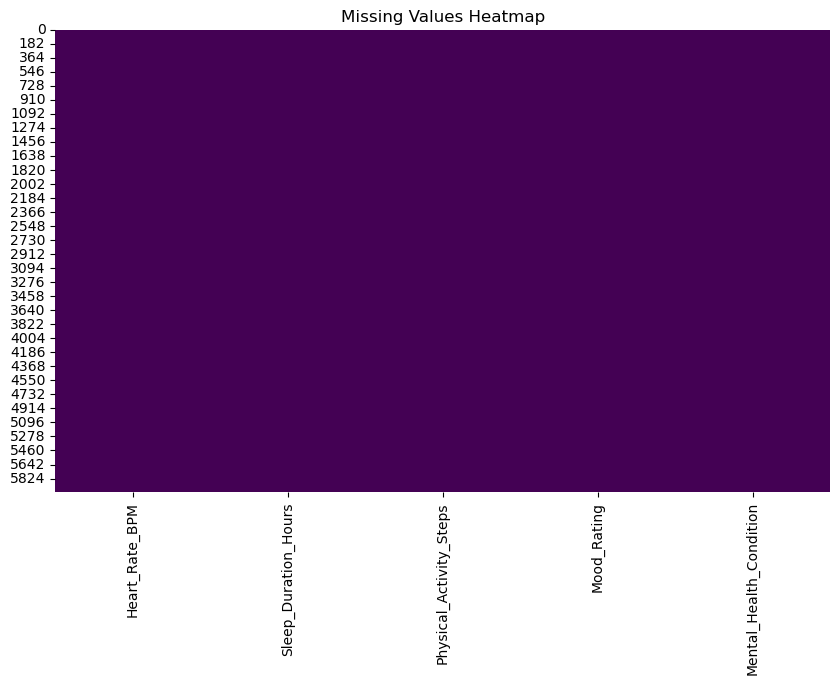

In [55]:
 print("\nDataset Information:")
print(df.info())

    # Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())

    # Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

    # Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())

    # Visualize missing values (if any)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

<Figure size 1000x800 with 0 Axes>

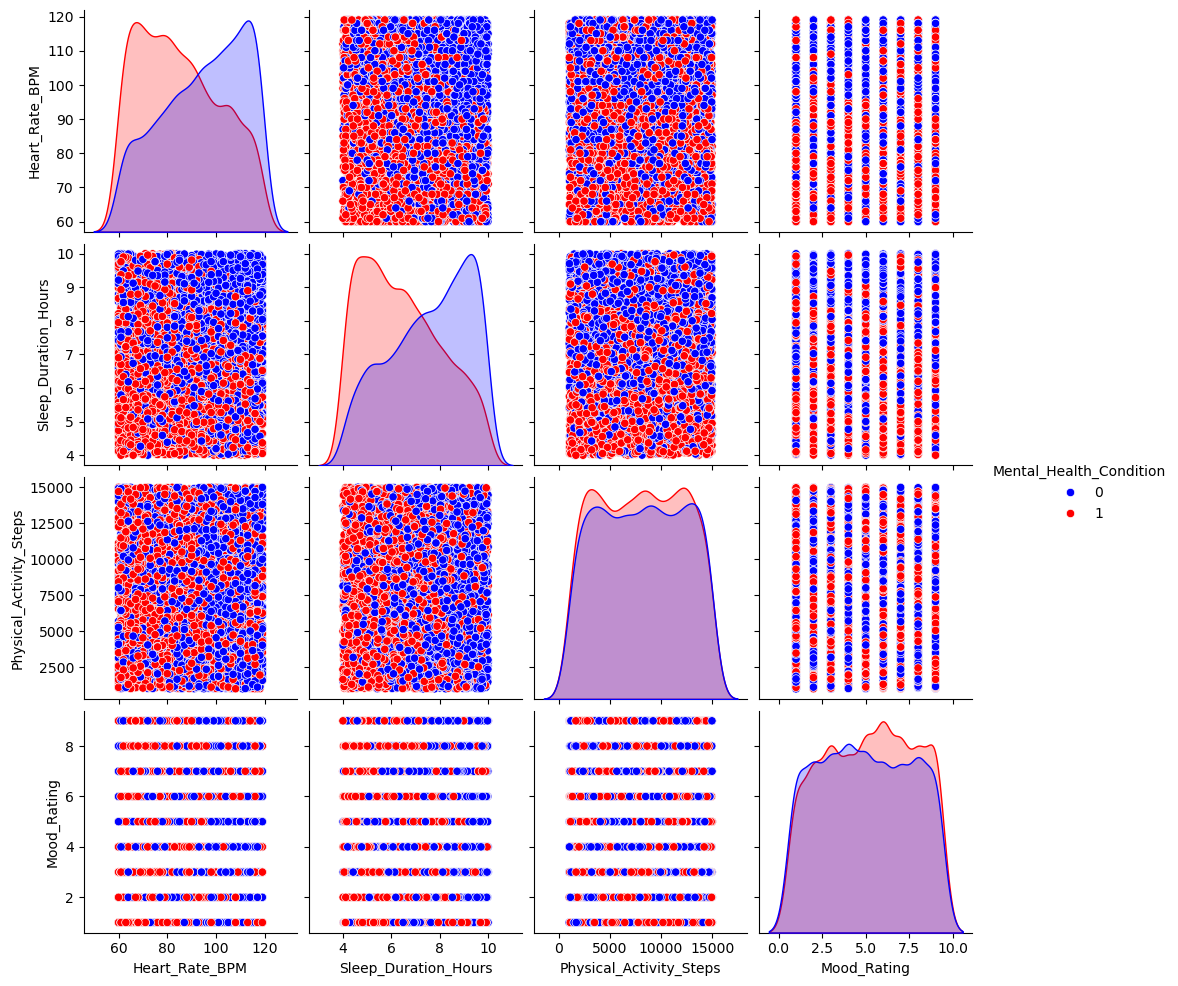

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
#Pairplot
plt.figure(figsize=(10,8))
sns.pairplot(df, hue='Mental_Health_Condition' ,palette={1: "red", 0: "blue"})
#plt.savefig("Binary_feaure.jpg", dpi=300, bbox_inches="tight")
plt.show()


Correlation Matrix:


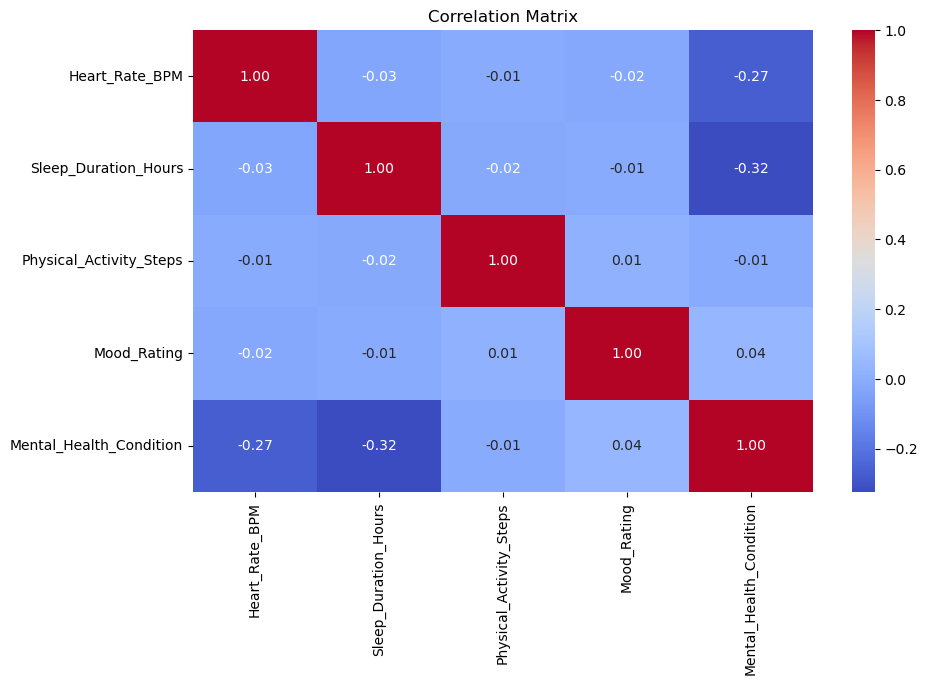

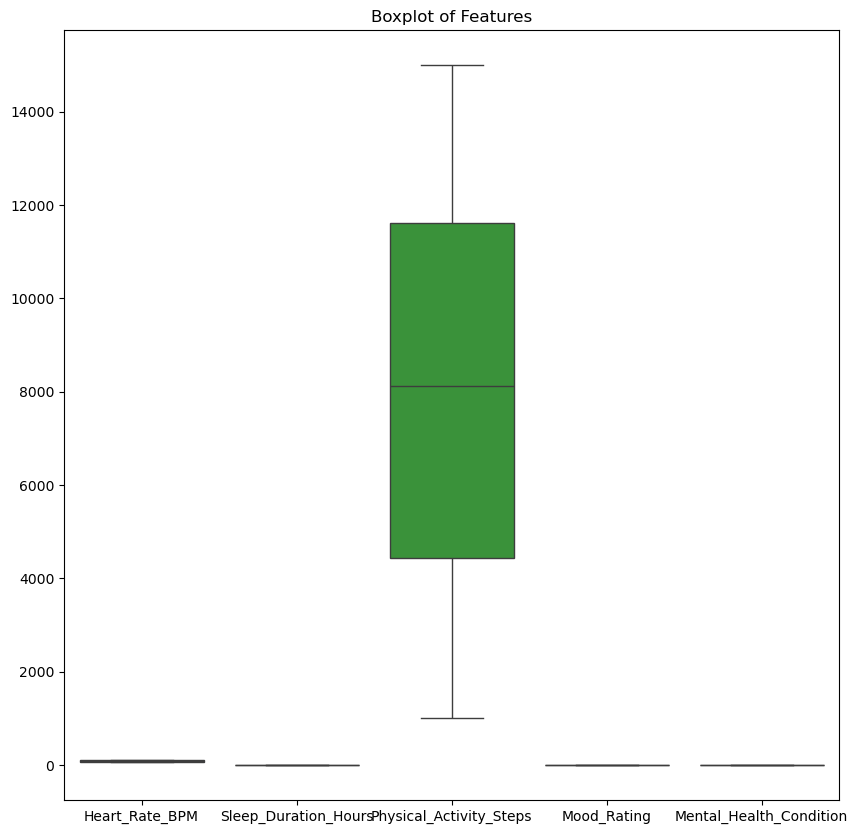

In [66]:
# Correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
print("\nCorrelation Matrix:")
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
#plt.savefig("Correlation Matrix.jpg", dpi=300, bbox_inches="tight")
plt.show()


#Boxplots
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.show()


Distribution of Numeric Columns:


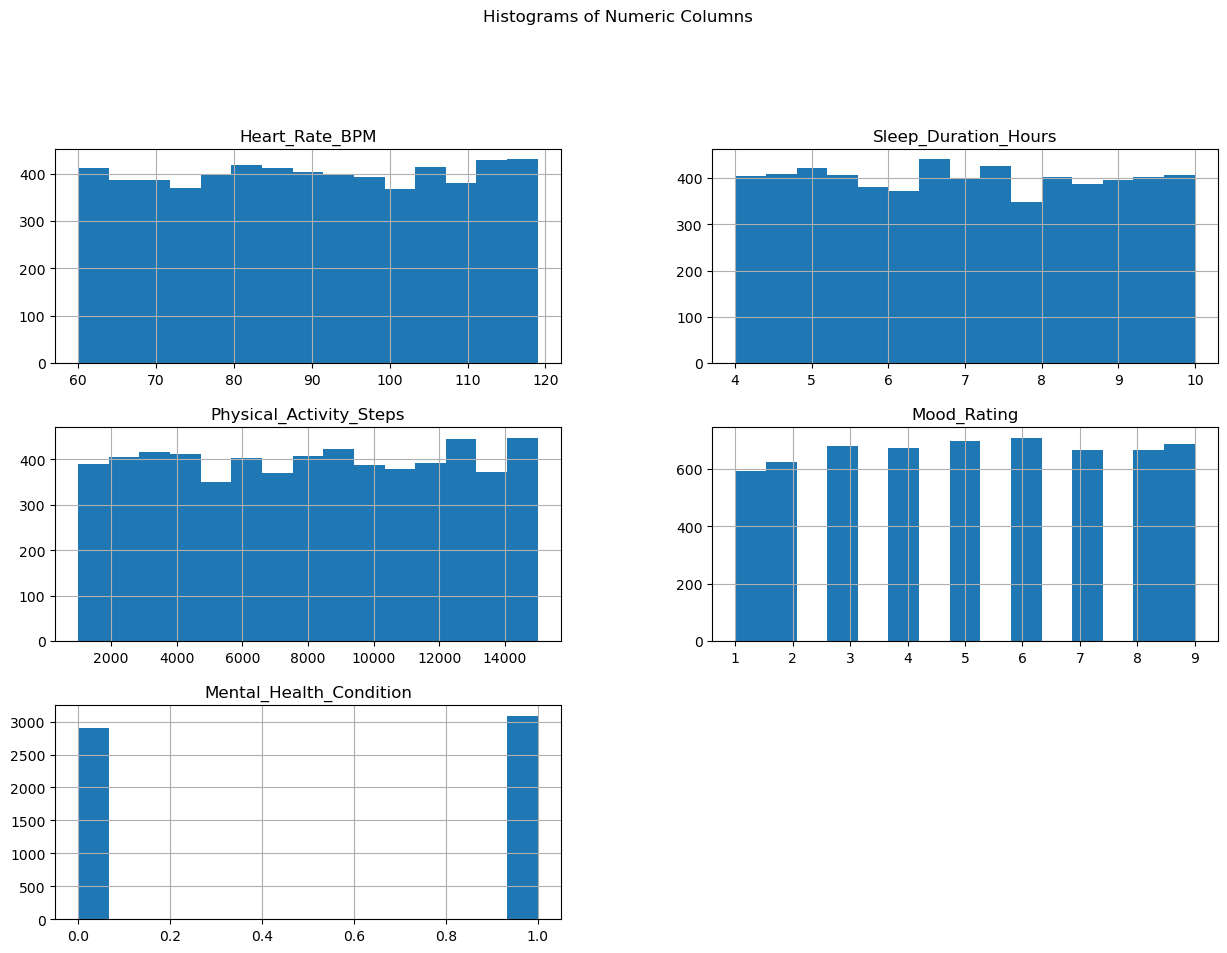

In [92]:
    print("\nDistribution of Numeric Columns:")
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df.hist(bins=15, figsize=(15, 10))
    plt.suptitle("Histograms of Numeric Columns", y=1.02)
    plt.show()

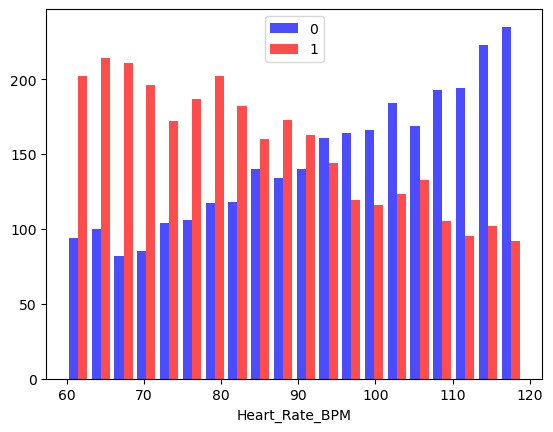

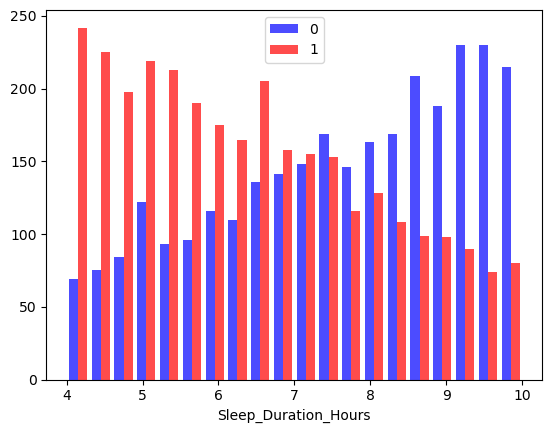

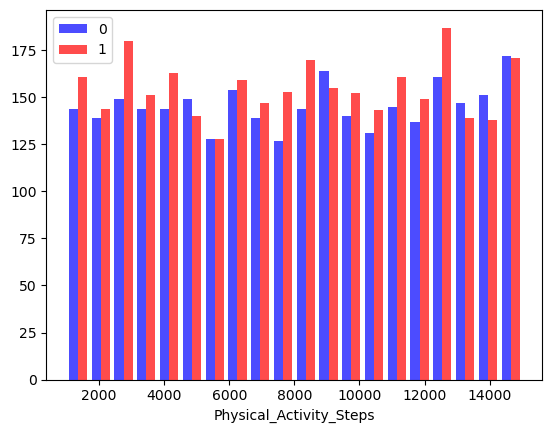

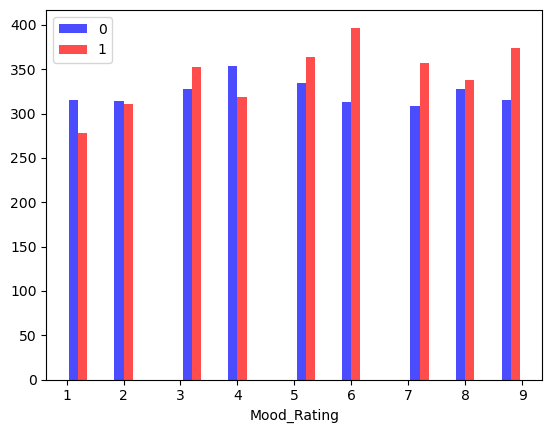

In [93]:
import matplotlib.pyplot as plt

for feature in features:
    plt.hist([df[df['Mental_Health_Condition']==0][feature],
              df[df['Mental_Health_Condition']==1][feature]],
             bins=20,color=['blue', 'red'], label=['0', '1'],alpha=0.7)

    plt.xlabel(feature)
    plt.legend()
    plt.savefig(f"{feature}_histogram.png", dpi=300, bbox_inches='tight')
    plt.show()